# Spectra in SINOPSIS format

From FSPS ([Conroy, Gunn, & White 2009](https://arxiv.org/abs/0809.4261)) models, we want to create a set of SSPs with a determined age and metallicity, and nebular emission. In this work, they use  $Z_\odot=0.019$.

FSFP models have the following options:
1. Mass: $0.1 M_\odot < M < 100 M_\odot$
2. Metallicity: $Z_\odot=0.020$
3. Libraries: __BaSeL__ 3.1, MILES, C3K
4. Isochrones: __Padova__, BaSTI, MIST, PARSEC, GENEVA, BPASS
5. IMF: Salpeter, Chabrier 2003, __Kroupa 2001__, van Dokkum 2008, Dave 2008

In __bold__ are the ones we are using.

#### BaSeL
Wavelenght range ($\mathring A$) = 91.0 $<$ $\lambda$ $<$ $10^{8}$

### Nebular emission

[Byler et al. 2017](https://iopscience.iop.org/article/10.3847/1538-4357/aa6c66/pdf) mentions that there are these parameters to work with when nebular emission is included:
* Age (Myr): 0.5, 1, 2, 3, 4, 5, 6, 7, 10 
* Metallicity; $\log_{10}Z/Z_{\odot}$: -2.5, −2.0, −1.5, −1.0, −0.6, −0.4, −0.3, −0.2, −0.1, 0.0, 0.1, 0.2
* Ionization parameter; $\log_{10}U_0$:−4.0, −3.5, −3.0, −2.5, −2.0, −1.5, −1.0

### SINOPSIS format
The files SINOPSIS needs are in a specific format:

Wavelenght ($\mathring A$) | Luminosity1 | Luminosity2 | ... | LuminosityN,

where the luminosities must be normilized to 1 $M_\odot$. We need a file with this format for each metallicity.

In [8]:
#Importing libraries
import fsps
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import math

In [ ]:
#SSP attributes declaration
logsolar = 0
#zsolar=0.019*math.exp(logsolar)
#g = round(zsolar,4)
logU = -2.0
ssp = fsps.StellarPopulation(zcontinuous=1,               # Type of interp for metallicity
                             sfh=0,                       # SSPs
                             imf_type=2,                  # Kroupa
                             add_dust_emission=False,     # Turns off dust emission
                             add_neb_emission=True,       # Turns on nebular emission 
                             add_neb_continuum=True,
                             nebemlineinspec=False,       # Removes lines from spectra
                             cloudy_dust=False,           # Add/remove dust from nebular emission
                             logzsol=logsolar,            # Solar metallicty
                             gas_logu=logU,               # Ionization parameter
                             gas_logz=logsolar)           # Gas metallicity (must be the same as stellar)


#Isochrones, library and dust emission models
#ssp.libraries

In [16]:
logsolar = 0
ssp = fsps.StellarPopulation(compute_vega_mags=False, zcontinuous=1, sfh=0, logzsol=logsolar)

ssp.libraries

(b'mist', b'miles', b'DL07  ')

#### Generation of SSP models

In [17]:
#Getting wavelenght and luminosity for the spectrum 
wave, spec = ssp.get_spectrum(peraa=True)
spec_transpose=np.transpose(spec)

#Variables containing wavelenghts and luminosity for nebular emission only
emission_lines_wave = ssp.emline_wavelengths
emission_lines_lum = ssp.emline_luminosity

#Obtainig the SFR and Tottal mass formed 
sfr = ssp.sfr
mass_tot = ssp.formed_mass

#Logaritmic values of stellar mass, age and bolometric luminosity
log_mass = ssp.stellar_mass
log_age = ssp.log_age
log_bol = ssp.log_lbol

print (emission_lines_wave.shape, emission_lines_lum.shape,spec.shape,wave.shape)
print (sfr.shape,log_mass.shape,log_bol.shape)

(128,) (107, 128) (107, 5994) (5994,)
(107,) (107,) (107,)


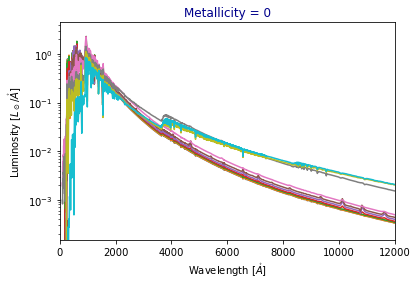

In [19]:
#Creating an array for lambda and each luminosity
#spec.shape[0]+1 is because we need a extra column to store the wavelenghts
wave_and_spec=np.zeros((spec.shape[1],spec.shape[0]+1))

#Filling wave_and_spec 
for i in range(wave_and_spec.shape[0]):
    wave_and_spec[i,0]=wave[i]
    #print (wave_and_spec[i,0],i)
    for j in range(1,wave_and_spec.shape[1]-1):
        #print (wave_and_spec[i,0],i,j)
        wave_and_spec[i,j]=spec_transpose[i,j]
#print (wave_and_spec.shape,wave_and_spec)

#print (wave_and_spec[,:])
#Checking the spectra

for j in range(25,35):
    plt.plot(wave_and_spec[:,0], wave_and_spec[:,j])
    plt.yscale('log')
    plt.xlabel('Wavelength [$\mathring A$]')
    plt.ylabel('Luminosity [$L_\odot/\mathring A$]')
    plt.axis([0, 12000, 1.5e-4, 4.5e-0])
    #plt.title('Metallicity = {}, Ionization parameter = {}'.format(logsolar,logU), color='darkblue')
    plt.title('Metallicity = {}'.format(logsolar), color='darkblue')


In [21]:
#Writing the matrix for wavelenght and luminosities in a file


#Getting ready the matrix for lumnosities
my_matrix = np.matrix(wave_and_spec)
my_matrix2 = np.matrix(log_age)
directory = '/Users/mrivas/Documents/skirt-simulations/'
#filename = '{}{}{}{}{}{}'.format('Mist_Miles_logZsolar_',logsolar,'_','logU_',logU,'.txt')
file_ages = '{}{}{}'.format('ages-nonebem-logZsolar_',logsolar,'.txt')
file_spectra = '{}{}{}'.format('spectra-nonebem_logZsolar_',logsolar,'.txt')

In [22]:
#File without ages
textfile_ages = open(directory+file_ages, 'w')
textfile_spectra = open(directory+file_spectra, 'w')

np.savetxt(textfile_ages, np.transpose(my_matrix2), header='ages')
np.savetxt(textfile_spectra, my_matrix, header='wavelength and luminosities for each age in Lsolar per AA')

textfile_ages.close()
textfile_spectra.close()

In [17]:
#File with ages
textfile = open(directory+filename, 'a')
np.savetxt(textfile, my_matrix2, header='ages')
np.savetxt(textfile, my_matrix, header='wavelength and luminosities for each age')
textfile.close()